In [1]:
import os

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 '.jovianrc',
 'House Price Prediction.ipynb',
 'model.pkl',
 'scale.pkl',
 'scale1.pkl',
 'Train.csv']

In [3]:
os.getcwd()

'C:\\Users\\zikra\\Data Analysis\\House Price Prediction\\Model'

In [4]:
import pandas as pd 
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import math
from sklearn.model_selection import train_test_split 

In [5]:
import pickle

In [6]:
!python -V

Active code page: 1252
Python 3.8.10


In [7]:
datadf = pd.read_csv('Train.csv')

In [8]:
data = datadf.copy()

In [9]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [10]:
data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [12]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [13]:
data.nunique()

POSTED_BY                    3
UNDER_CONSTRUCTION           2
RERA                         2
BHK_NO.                     16
BHK_OR_RK                    2
SQUARE_FT                19561
READY_TO_MOVE                2
RESALE                       2
ADDRESS                   6899
LONGITUDE                 4087
LATITUDE                  4078
TARGET(PRICE_IN_LACS)     1172
dtype: int64

<AxesSubplot:>

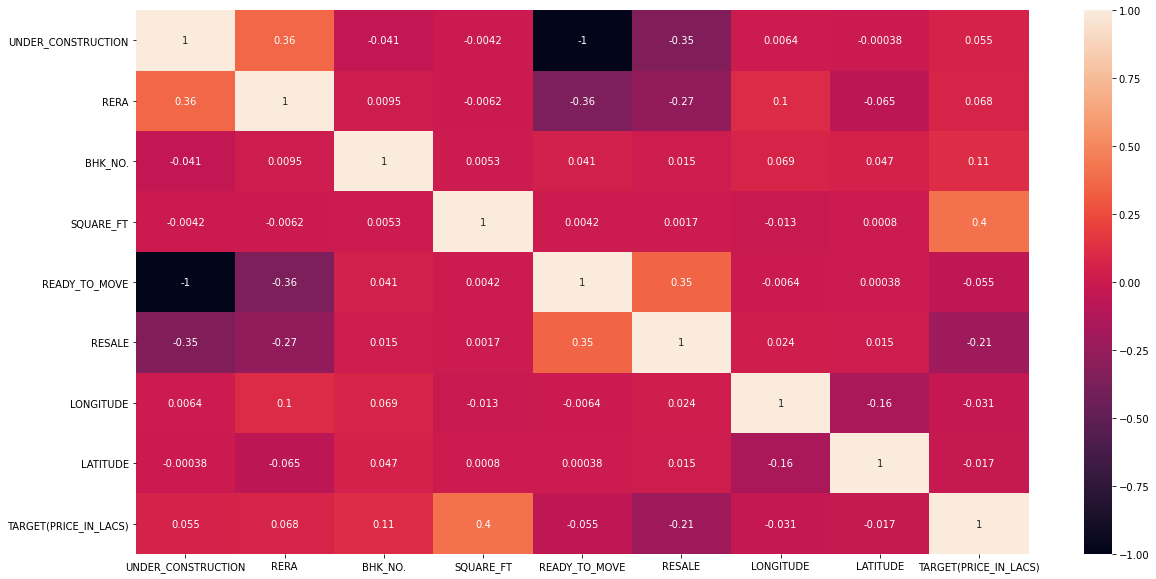

In [14]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True)

In [15]:
data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [16]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [17]:
data = pd.get_dummies(data, columns = ['POSTED_BY','BHK_OR_RK'],drop_first = True)
data.drop(['ADDRESS'], axis = 1, inplace = True)
data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,1,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,1,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,1,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,1,0,0


In [18]:
sample_data = data.sample(n = 300)
sample_data.shape

(300, 12)

<Figure size 3600x2160 with 0 Axes>

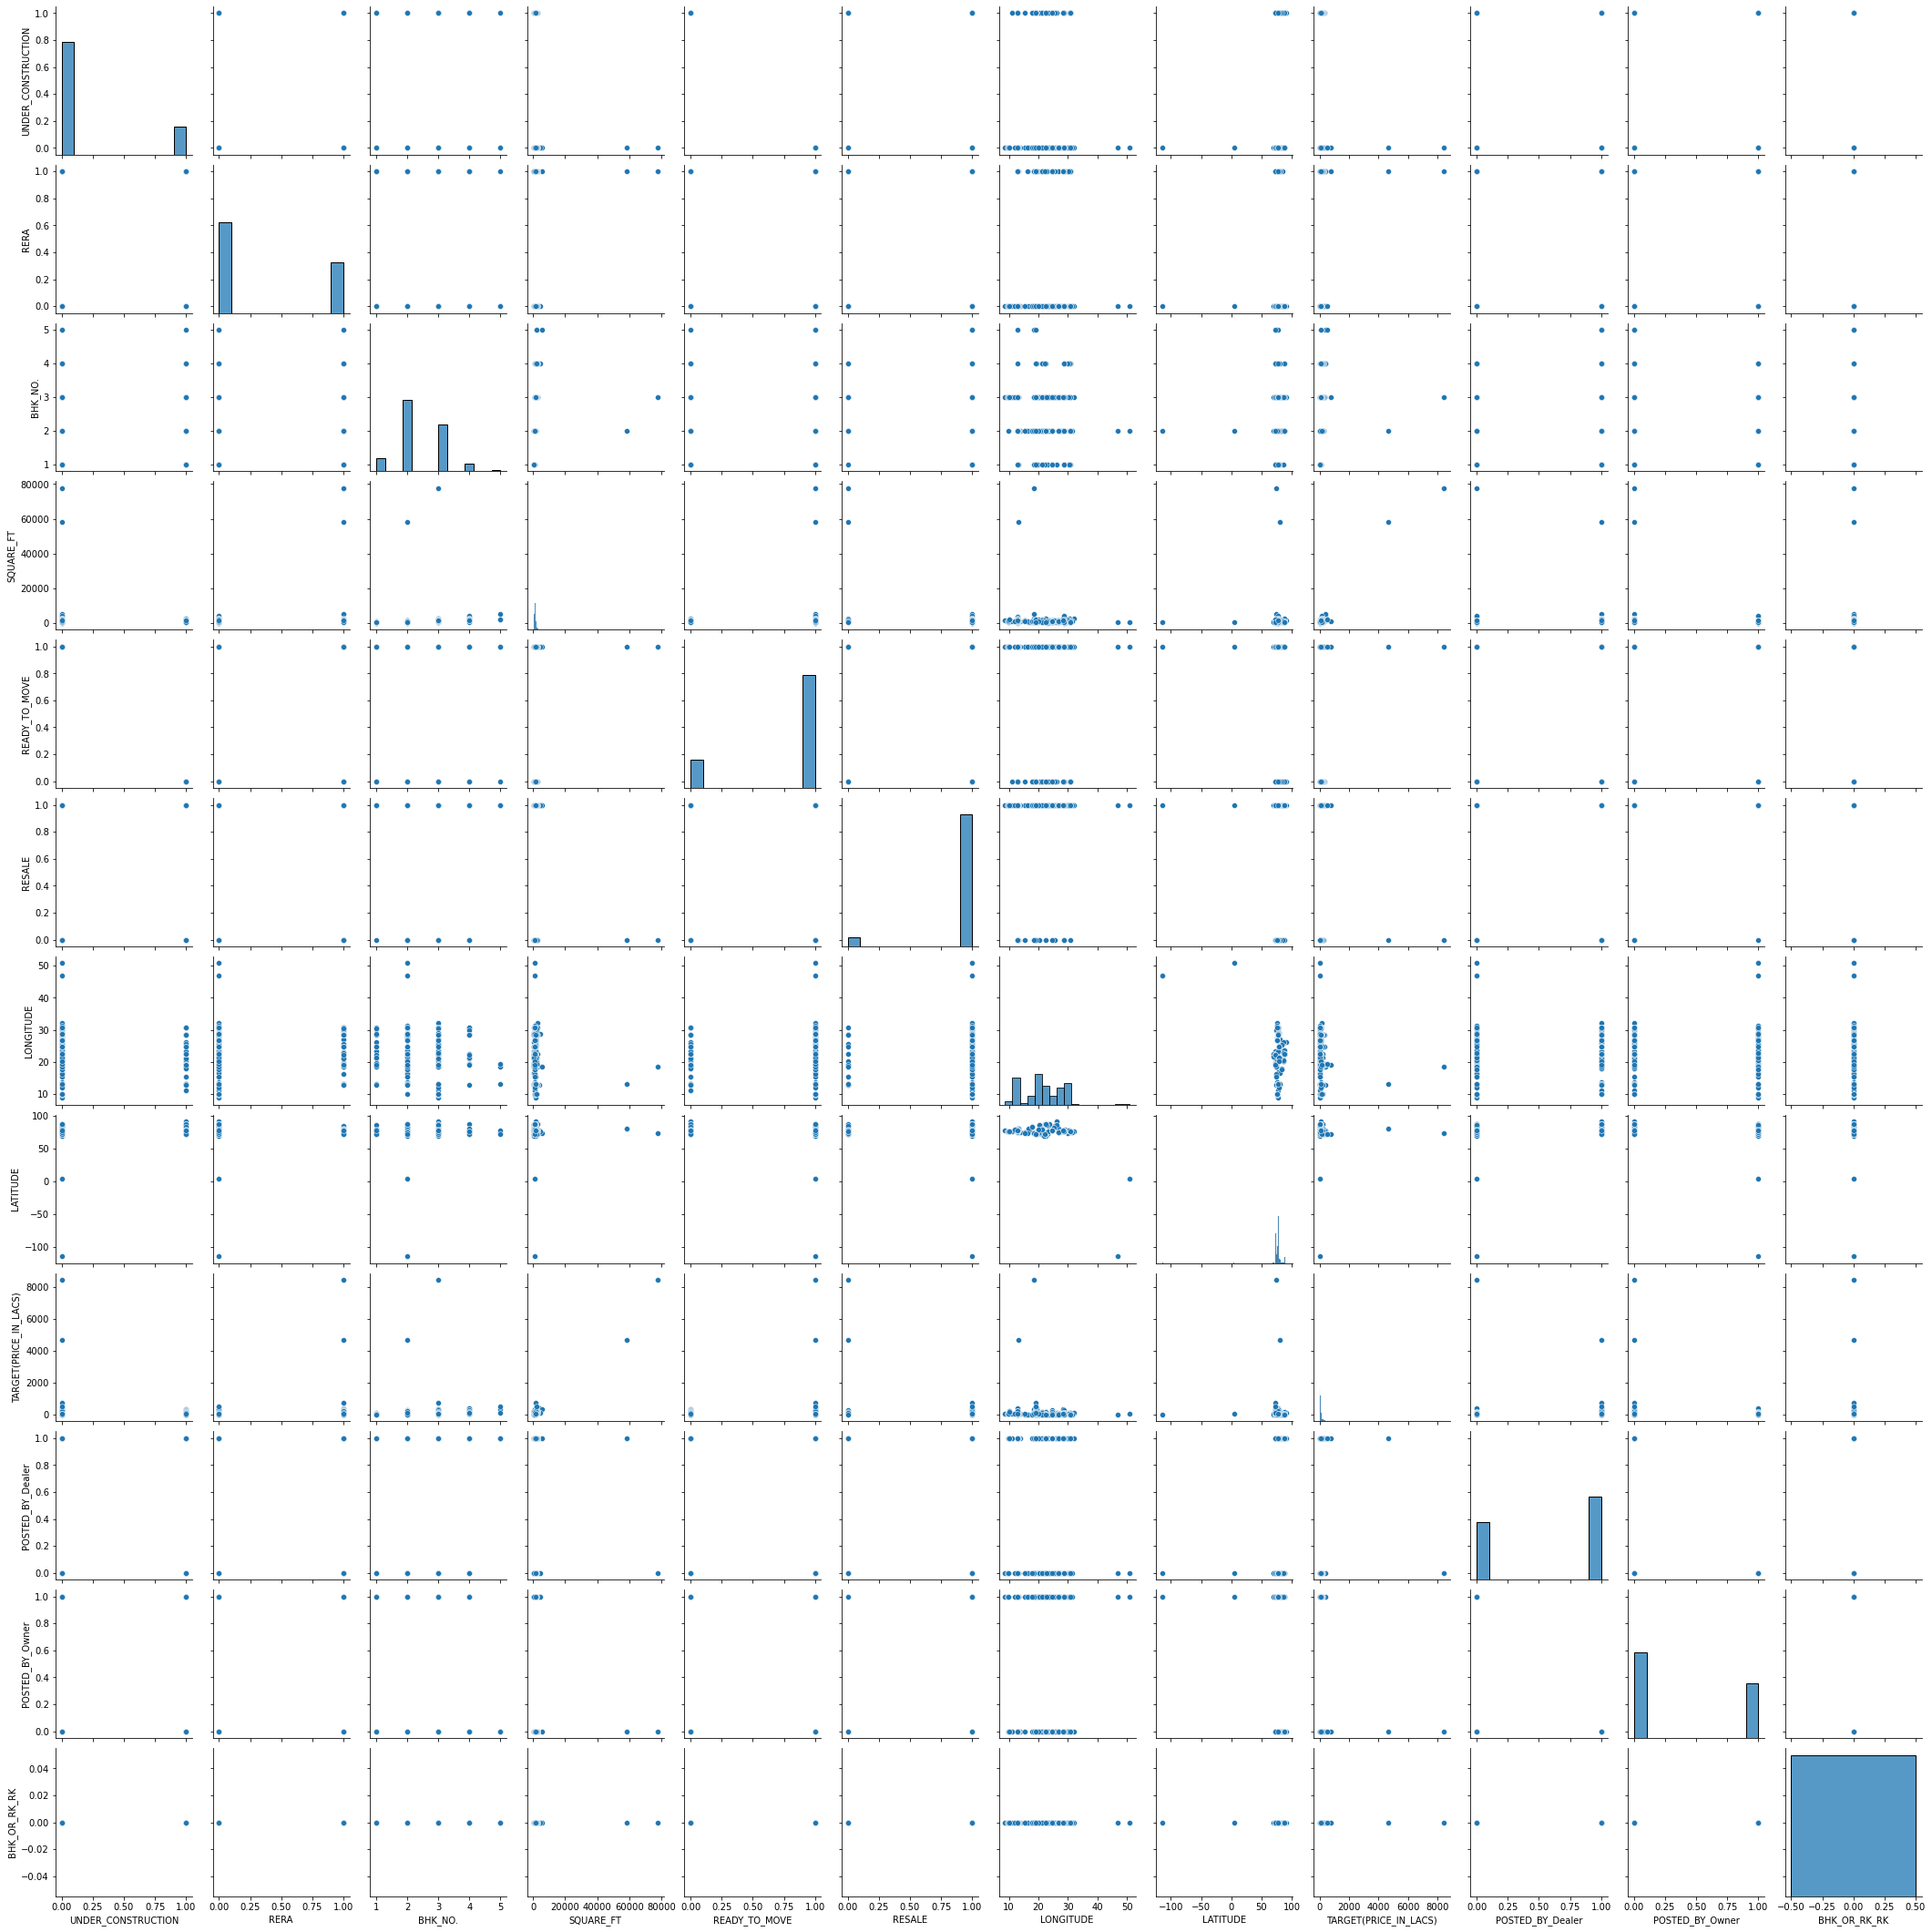

In [19]:
plt.figure(figsize = (50,30))
sns.pairplot(sample_data)

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

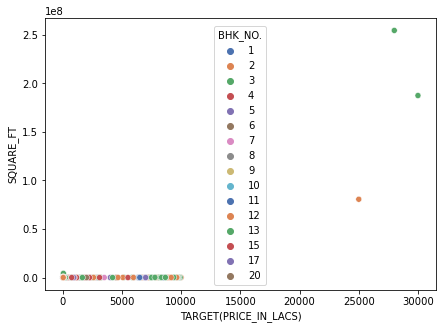

In [20]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = data, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

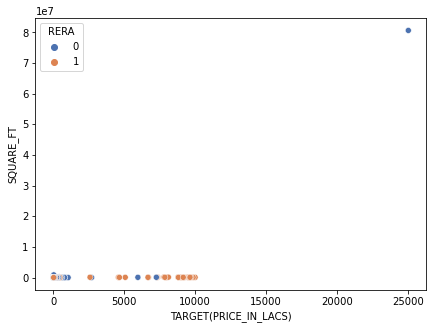

In [21]:
DF = data[data['BHK_NO.'] == 2]
plt.figure(figsize = (7,5))
sns.scatterplot(data = DF, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'RERA', palette = 'deep')

I have specified the dataset with data['BHK_NO.'] == 2 just to know the result precisely , you can change the no of BHK to get the idea of RERA approved properties.

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

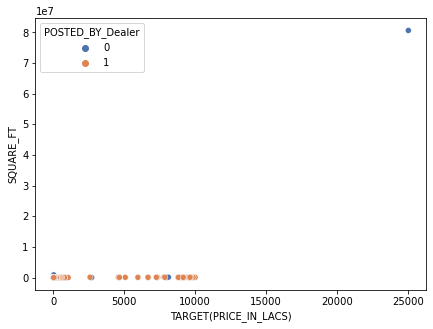

In [22]:
DF = data[data['BHK_NO.'] == 2]
plt.figure(figsize = (7,5))
sns.scatterplot(data = DF, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'POSTED_BY_Dealer', palette = 'deep')

I have specified the dataset with data['BHK_NO.'] == 2 just to know the result precisely , you can change the no of BHK to know the distribution of properties posted by dealer or owner

In [23]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(np.where(z > 3))

(array([   34,    40,    40, ..., 29440, 29447, 29447], dtype=int64), array([5, 5, 8, ..., 5, 6, 7], dtype=int64))


In [24]:
DD = data[(z < 3).all(axis = 1)]

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

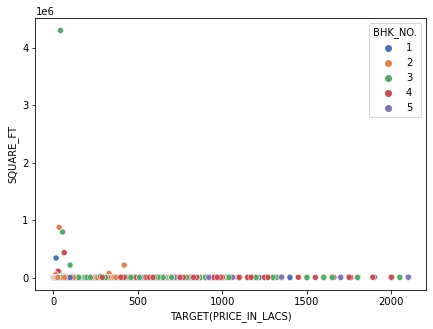

In [25]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = DD, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [26]:
DD.shape

(27014, 12)

In [27]:
data.shape

(29451, 12)

As,by using Z score we are facing data loss and also found that it is not satisfactory in removing outliers, so will no remove outliers by Z score.

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

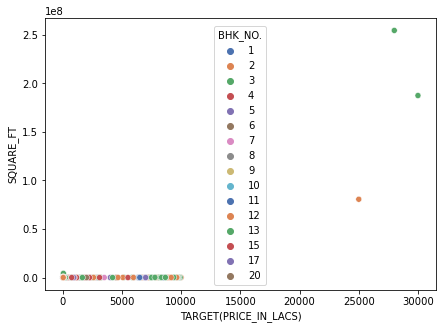

In [28]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = data, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [29]:
data[data['TARGET(PRICE_IN_LACS)'] >= 25000]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
10745,0,0,3,2.545455e+08,1,1,13.021000,77.938000,28000.0,0,1,0
11238,0,0,3,1.875000e+08,1,1,13.018900,77.596300,30000.0,1,0,0
15724,0,0,2,8.064516e+07,1,1,12.795926,77.331535,25000.0,0,1,0


In [30]:
dd = data[((data['LATITUDE'] >= 77.1 ) & (data['LATITUDE'] < 78)) & ((data['LONGITUDE'] >= 12.5) & (data['LONGITUDE'] < 13.05))]
dd

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,1,0
11,0,0,2,1333.010179,1,1,13.040340,77.591347,110.0,1,0,0
12,0,0,2,927.177902,1,1,12.969910,77.597960,48.0,0,1,0
14,0,0,1,649.983750,1,1,13.035200,77.577200,20.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29404,0,1,2,942.269409,1,1,12.860000,77.786000,28.4,1,0,0
29408,0,0,2,1105.845182,1,1,13.031800,77.658300,42.0,1,0,0
29415,0,0,4,3650.240584,1,1,12.995893,77.761394,220.0,0,1,0
29433,0,0,2,1195.028681,1,1,12.876691,77.599080,50.0,0,1,0


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

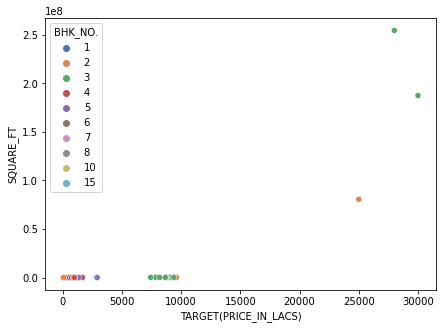

In [31]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = dd, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [32]:
data.drop([10745,11238,15724], inplace = True)


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

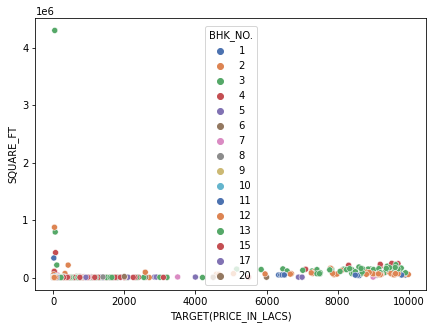

In [33]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = data, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [34]:
data[data['SQUARE_FT'] >= 4000000]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
25241,0,0,3,4300000.0,1,1,10.810426,78.668914,43.0,0,1,0


In [35]:
data[((data['LATITUDE'] >= 78.5 ) & (data['LATITUDE'] < 79)) & ((data['LONGITUDE'] >= 10.5) & (data['LONGITUDE'] < 11))]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
4206,0,0,2,1.139089e+03,1,1,10.818481,78.680732,38.0,0,1,0
18529,0,0,2,6.301197e+02,1,1,10.818481,78.680732,30.0,0,1,0
24341,0,0,2,1.500273e+03,1,1,10.818481,78.680732,55.0,0,1,0
25241,0,0,3,4.300000e+06,1,1,10.810426,78.668914,43.0,0,1,0


In [36]:
data['SQUARE_FT'] = data['SQUARE_FT'].replace([4.300000e+06], 4.300000e+03)

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

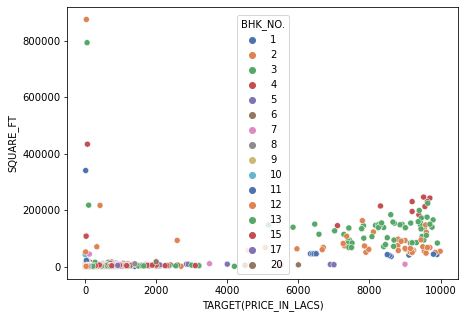

In [37]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = data, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [38]:
data[data['SQUARE_FT']>700000]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
15598,0,0,3,792857.1429,1,1,32.674044,74.907348,55.5,0,1,0
28591,0,0,2,875000.0000,1,1,30.466084,74.501902,35.0,0,1,0


In [39]:
data[((data['LATITUDE'] > 74.49 ) & (data['LATITUDE'] <= 75)) & ((data['LONGITUDE'] >= 30.2) & (data['LONGITUDE'] < 32.8))]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
788,0,0,2,1267.197683,1,1,31.682414,74.907510,35.0,0,1,0
5503,0,0,2,1170.177198,1,1,31.634005,74.812330,35.0,0,1,0
6082,0,0,2,746.268657,1,1,31.626993,74.846931,11.5,0,1,0
12400,0,0,2,719.942405,1,1,31.640730,74.814458,20.0,0,1,0
12634,0,0,2,674.835731,1,1,31.629929,74.891663,38.0,0,1,0
13832,0,0,2,1350.210970,1,1,31.655053,74.891633,48.0,0,1,0
15474,0,0,2,1500.164853,1,1,31.654723,74.861559,45.5,0,1,0
15598,0,0,3,792857.142900,1,1,32.674044,74.907348,55.5,0,1,0
18941,0,0,2,1200.000000,1,1,31.629929,74.891663,42.0,0,1,0
19462,0,0,2,1121.894410,1,1,32.728523,74.849860,28.9,0,1,0


In [40]:
data.drop([15598,28591], inplace = True)

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

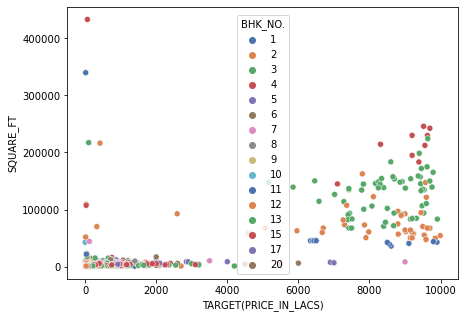

In [41]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = data, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [42]:
data[data['SQUARE_FT']>300000]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
373,0,0,4,433333.3333,1,1,9.893479,76.408774,65.0,0,1,0
22155,0,0,1,340000.0000,1,1,22.323406,73.240395,17.0,0,1,0


In [43]:
d3 = data[((data['LATITUDE'] > 76.3 ) & (data['LATITUDE'] <= 76.5)) & ((data['LONGITUDE'] >= 9.8) & (data['LONGITUDE'] < 9.99))]
d3

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
113,1,0,3,1600.170685,0,1,9.952439,76.363296,75.0,0,1,0
373,0,0,4,433333.333300,1,1,9.893479,76.408774,65.0,0,1,0
971,0,0,2,908.832718,1,1,9.978538,76.301221,32.0,0,1,0
1393,0,0,3,1350.007105,1,1,9.940109,76.371995,95.0,1,0,0
1943,0,0,3,1310.211946,1,1,9.966018,76.318152,68.0,0,1,0
3506,0,0,2,1024.231826,1,1,9.965402,76.332680,41.0,0,1,0
4027,0,0,3,1223.348480,1,1,9.946434,76.347436,35.0,0,1,0
4752,0,0,3,1493.280239,1,1,9.966018,76.318152,60.0,1,0,0
4899,0,0,3,1562.500000,1,1,9.878060,76.303890,48.0,0,1,0
5506,0,0,2,1244.907198,1,1,9.952439,76.363296,55.0,1,0,0


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

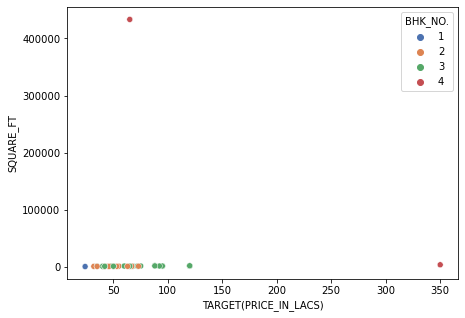

In [44]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = d3, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [45]:
data[data['SQUARE_FT']>300000]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
373,0,0,4,433333.3333,1,1,9.893479,76.408774,65.0,0,1,0
22155,0,0,1,340000.0000,1,1,22.323406,73.240395,17.0,0,1,0


In [46]:
d4 = data[((data['LATITUDE'] >= 73.24 ) & (data['LATITUDE'] < 73.3)) & ((data['LONGITUDE'] >= 22.32) & (data['LONGITUDE'] < 22.4))]
d4

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
5889,0,0,2,1205.377840,1,1,22.323406,73.240395,26.0,0,1,0
6769,0,0,2,750.144258,1,1,22.323406,73.240395,26.0,0,1,0
9415,0,1,3,1486.013986,1,1,22.323406,73.240395,34.0,0,1,0
18666,0,0,3,1325.301205,1,1,22.323406,73.240395,33.0,0,1,0
19619,0,0,2,531.914894,1,1,22.323406,73.240395,17.0,0,1,0
22155,0,0,1,340000.000000,1,1,22.323406,73.240395,17.0,0,1,0
24127,0,0,2,1049.748973,1,1,22.323406,73.240395,23.0,0,1,0
24509,0,0,2,1050.247117,1,1,22.323406,73.240395,25.5,0,1,0
25818,0,1,1,800.182899,1,1,22.323406,73.240395,17.5,0,1,0
27180,0,0,2,1295.647824,1,1,22.323406,73.240395,25.9,0,1,0


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

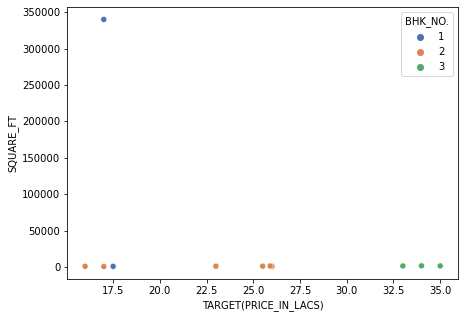

In [47]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = d4, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [48]:
data.drop([373,22155], inplace = True)

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

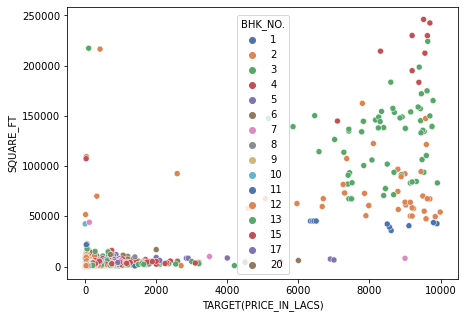

In [49]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = data, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [50]:
data[(data['SQUARE_FT'] >200000 )]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
6462,1,1,4,230000.0000,0,0,30.735280,76.791110,9200.0,1,0,0
8381,0,0,2,216494.8454,1,1,24.690280,78.418890,420.0,1,0,0
13035,0,0,4,242500.0000,1,0,23.399528,85.357421,9700.0,0,0,0
13393,1,1,4,229832.9356,0,0,30.735280,76.791110,9630.0,1,0,0
16439,1,1,4,212444.4444,0,0,30.651192,76.755011,9560.0,1,0,0
16826,1,1,4,214451.6129,0,0,30.651192,76.755011,8310.0,1,0,0
19047,1,1,4,246008.7833,0,0,21.000000,77.000000,9523.0,1,0,0
20398,0,0,3,217391.3043,1,1,24.690280,78.418890,100.0,1,0,0
26891,0,0,3,224238.1949,1,0,28.362327,76.979049,9640.0,1,0,0


In [51]:
d4 = data[((data['LATITUDE'] > 78.4 ) & (data['LATITUDE'] < 78.5)) & ((data['LONGITUDE'] >= 24.65) & (data['LONGITUDE'] < 24.7))]
d4

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
40,1,1,1,40606.195680,0,0,24.69028,78.41889,9110.0,1,0,0
47,0,0,1,475.010326,1,1,24.69028,78.41889,46.0,1,0,1
48,1,1,1,301.917116,0,0,24.69028,78.41889,26.3,0,0,0
62,1,1,2,906.266183,0,0,24.69028,78.41889,70.0,1,0,0
146,0,1,2,1149.131767,1,1,24.69028,78.41889,180.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29283,0,0,2,800.000000,1,1,24.69028,78.41889,59.0,1,0,0
29284,1,1,1,560.000000,0,1,24.69028,78.41889,77.0,1,0,0
29293,0,0,1,21739.130430,1,1,24.69028,78.41889,35.0,1,0,0
29298,0,0,1,650.003351,1,1,24.69020,78.41600,97.0,1,0,0


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

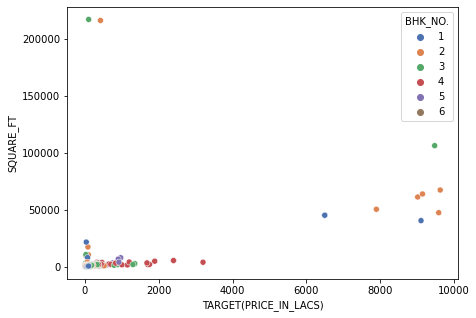

In [52]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = d4, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [53]:
data.drop([8381,20398,21739], inplace = True)

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

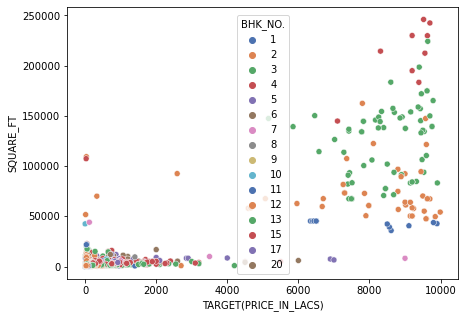

In [54]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = data, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [55]:
data[(data['SQUARE_FT'] >100000 ) & (data['TARGET(PRICE_IN_LACS)'] <1000)]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
2951,0,0,2,109375.0000,1,1,16.462200,80.617900,35.0,0,1,0
26025,0,0,4,107407.4074,1,1,28.989147,77.005083,29.0,0,1,0


In [56]:
d5 = data[((data['LATITUDE'] > 80.5 ) & (data['LATITUDE'] <= 80.8)) & ((data['LONGITUDE'] >= 16.4) & (data['LONGITUDE'] < 16.5))]
d5

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
539,1,0,2,1209.816799,0,1,16.498436,80.653706,35.0,0,1,0
917,0,0,2,850.077280,1,1,16.485583,80.662422,22.0,0,1,0
1029,0,1,2,1075.268817,1,1,16.494167,80.598886,34.0,0,1,0
1059,0,0,3,1600.000000,1,0,16.474310,80.712810,62.4,0,0,0
2000,1,1,2,1176.668914,0,0,16.461088,80.717926,34.9,0,0,0
2378,0,0,2,1005.137369,1,1,16.494167,80.598886,45.0,0,1,0
2880,0,0,2,839.944004,1,1,16.474310,80.712810,18.0,0,1,0
2951,0,0,2,109375.000000,1,1,16.462200,80.617900,35.0,0,1,0
4164,0,0,3,1649.862511,1,1,16.481141,80.688775,72.0,0,1,0
5569,0,0,3,1540.041068,1,1,16.481141,80.688775,75.0,0,1,0


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

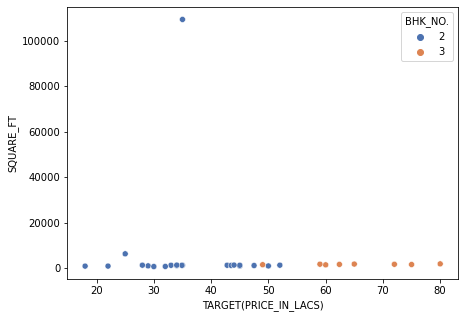

In [57]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = d5, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [58]:
d6 = data[((data['LATITUDE'] >=77 ) & (data['LATITUDE'] < 77.2)) & ((data['LONGITUDE'] >= 28.9) & (data['LONGITUDE'] < 29))]
d6

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
534,0,0,3,1495.359230,1,1,28.990399,77.059442,43.5,0,1,0
1602,0,0,4,2200.055417,1,1,28.995663,77.077794,79.4,0,1,0
1645,0,0,2,1235.154394,1,1,28.995663,77.077794,26.0,0,1,0
1889,0,0,2,1350.403367,1,1,28.995663,77.077794,38.5,1,0,0
3714,0,0,2,1347.812201,1,1,28.995663,77.077794,42.2,1,0,0
4919,0,0,3,1724.137931,1,1,28.995663,77.077794,56.5,1,0,0
5567,0,0,3,2250.409165,1,1,28.995830,77.011390,55.0,0,1,0
5621,0,0,4,1915.250180,1,1,28.995663,77.077794,80.0,0,1,0
5742,0,0,4,1914.486280,1,1,28.995663,77.077794,60.0,0,1,0
8039,0,0,2,992.125984,1,1,28.990399,77.059442,25.2,1,0,0


In [59]:
data.drop([26025,2951], inplace = True)

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

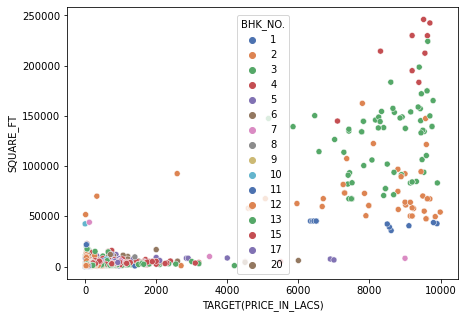

In [60]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = data, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [61]:
data[data['BHK_OR_RK_RK'] == 1]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
47,0,0,1,475.010326,1,1,24.690280,78.418890,46.0,1,0,1
2373,0,0,1,350.009052,1,1,24.690280,78.418890,58.0,1,0,1
2685,1,0,1,400.000000,0,1,19.216097,72.821721,45.0,1,0,1
5623,0,0,1,375.006335,1,1,19.235000,72.859800,74.0,0,1,1
8455,0,0,1,450.045005,1,1,19.049989,73.077321,30.0,1,0,1
9156,1,0,1,196.942082,0,1,19.147866,72.932609,38.9,1,0,1
11853,0,0,1,350.008077,1,1,22.720512,75.834224,65.0,1,0,1
13666,1,1,1,440.000000,0,1,24.690280,78.418890,22.0,1,0,1
14124,1,1,1,449.982693,0,1,19.175900,72.952200,65.0,1,0,1
14400,0,0,1,360.023041,1,1,24.690280,78.418890,50.0,1,0,1


here we found that only 1 BHK houses are of RK category

In [62]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
count,29439.000000,29439.000000,29439.000000,29439.000000,29439.000000,29439.000000,29439.000000,29439.000000,29439.000000,29439.000000,29439.000000,29439.000000
mean,0.179829,0.318047,2.392201,1804.221929,0.820171,0.929549,21.300186,76.837637,140.109700,0.621183,0.357689,0.000815
std,0.384052,0.465726,0.879090,7840.221630,0.384052,0.255910,6.204619,10.559828,594.998283,0.485101,0.479328,0.028541
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,900.019566,1.000000,1.000000,18.452663,73.798100,38.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1175.015461,1.000000,1.000000,20.750000,77.324137,62.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,3.000000,1550.387597,1.000000,1.000000,26.900926,77.822074,100.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,20.000000,246008.783300,1.000000,1.000000,59.912884,152.962676,9990.000000,1.000000,1.000000,1.000000


In [63]:
datadf[datadf['SQUARE_FT'] < 100]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
2092,Owner,0,0,2,BHK,5.000000,1,1,"Sector-29 Chandigarh,Chandigarh",30.755000,76.777256,45.0
2323,Owner,0,0,2,BHK,49.800797,1,1,"Civil Lines,Nagpur",21.152819,79.069531,30.0
2981,Owner,0,0,3,BHK,99.975006,1,1,"Bhatnagar Colony,Jind",29.305611,76.323316,40.0
3269,Owner,0,0,2,BHK,3.000000,1,1,"industrial area,Hajipur",23.525713,87.287479,12.0
4774,Owner,0,0,2,BHK,98.000784,1,1,"Dodhpur,Aligarh",27.244478,77.782574,50.0
9390,Owner,0,0,1,BHK,54.999450,1,1,"Sector-17 Vasundhara,Ghaziabad",28.649273,77.355737,35.0
9825,Owner,0,0,2,BHK,74.000987,1,1,"Baina Vasco,Goa",15.395220,73.807730,39.0
10462,Owner,0,0,1,BHK,55.000000,1,1,"Govardhan,Mathura",27.494145,77.465069,16.5
10496,Owner,1,1,2,BHK,70.883870,0,1,"Sangolda,Goa",15.550351,73.805282,48.8
10716,Owner,0,0,2,BHK,91.000091,1,1,"Swarna Jayanti Nagar,Aligarh",27.892383,78.101489,30.0


In [64]:
data.drop(data[data['SQUARE_FT'] < 100].index, inplace = True)

In [65]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
count,29412.000000,29412.000000,29412.000000,29412.000000,29412.000000,29412.000000,29412.000000,29412.000000,29412.000000,29412.000000,29412.000000,29412.000000
mean,0.179859,0.318237,2.392935,1805.829912,0.820141,0.929553,21.297961,76.836710,140.215078,0.621753,0.357167,0.000816
std,0.384076,0.465800,0.878878,7843.639786,0.384076,0.255904,6.205309,10.563997,595.261021,0.484958,0.479173,0.028554
min,0.000000,0.000000,1.000000,100.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,900.032144,1.000000,1.000000,18.452663,73.798100,38.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1175.088132,1.000000,1.000000,20.750000,77.324137,62.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,3.000000,1550.495588,1.000000,1.000000,26.900926,77.819388,100.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,20.000000,246008.783300,1.000000,1.000000,59.912884,152.962676,9990.000000,1.000000,1.000000,1.000000


In [66]:
data[(data['TARGET(PRICE_IN_LACS)'] < 6)]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
3882,0,0,10,42500.000000,1,1,12.720000,77.820000,0.85,0,1,0
8347,0,1,3,1333.333333,1,1,22.288976,73.128222,1.00,0,1,0
8435,0,0,1,296.969697,1,1,21.000000,77.000000,4.90,0,1,0
10177,0,0,1,700.280112,1,1,28.468976,77.026401,5.00,0,1,0
10678,0,0,1,900.900901,1,1,21.778398,72.171336,5.00,0,1,0
11530,0,0,1,350.095481,1,1,26.928785,75.828002,5.50,0,1,0
11729,0,0,1,495.238095,1,1,58.691753,-117.001699,5.20,0,1,0
14036,0,0,3,1923.076923,1,1,20.282380,85.855363,0.25,0,1,0
15314,0,0,1,425.079702,1,1,31.214709,75.766473,4.00,0,1,0
15509,0,0,1,340.095465,1,1,23.244599,87.083680,5.70,0,1,0


In [67]:
data.drop(data[(data['TARGET(PRICE_IN_LACS)'] < 6)].index, inplace = True)

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

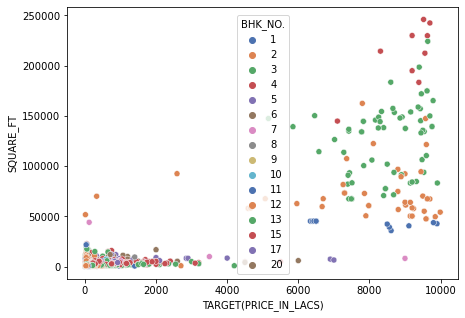

In [68]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = data, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT', hue = 'BHK_NO.', palette = 'deep')

In [69]:
DATA = data.copy()

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
X = DATA.drop('TARGET(PRICE_IN_LACS)',axis = 1)
features = X[X.columns]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X[X.columns] = features


In [72]:
y = DATA['TARGET(PRICE_IN_LACS)']
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29383, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 

In [74]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor(n_estimators = 1000,random_state = 42)
rg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [75]:
pred = rg.predict(X_test)

In [76]:
mse = mean_squared_error(y_test,pred)
rmse = math.sqrt(mse)
r = r2_score(y_test,pred)
print('RMSE = ',rmse)
print('\nr2 score = ',r)

RMSE =  117.10073776712917

r2 score =  0.961581825381928


In [77]:
score = cross_val_score(rg,X,y,cv=10)

In [78]:
print('\ncross validation score = ',score.mean())


cross validation score =  0.9488189772063071


In [79]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [80]:
pred2 = dt.predict(X_test)

In [81]:
mse2 = mean_squared_error(y_test,pred2)
rmse2 = math.sqrt(mse2)
r2 = r2_score(y_test,pred2)
print('RMSE = ',rmse2)
print('\nr2 score = ',r2)

RMSE =  150.06255219164254

r2 score =  0.9369097685635955


In [82]:
score = cross_val_score(dt,X,y,cv=10)
print('\ncross validation score = ',score.mean())


cross validation score =  0.9260995731919124


In [83]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [84]:
pred3 = lm.predict(X_test)

In [85]:
mse3 = mean_squared_error(y_test,pred3)
rmse3 = math.sqrt(mse3)
r3 = r2_score(y_test,pred3)
print('RMSE = ',rmse3)
print('\nr2 score = ',r3)

RMSE =  291.19558581607873

r2 score =  0.762432494116685


In [86]:
score = cross_val_score(lm,X,y,cv=10)
print('\ncross validation score = ',score.mean())


cross validation score =  0.7444613908795891


In [87]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [88]:
pred4 = knn.predict(X_test)

In [89]:
mse4 = mean_squared_error(y_test,pred4)
rmse4 = math.sqrt(mse4)
r4 = r2_score(y_test,pred4)
print('RMSE = ',rmse4)
print('\nr2 score = ',r4)

RMSE =  140.2954085199788

r2 score =  0.94485522365451


In [90]:
score = cross_val_score(knn,X,y,cv=10)
print('\ncross validation score = ',score.mean())


cross validation score =  0.9260903228575039


Here we can see that Random Forest Regressor has got best RMSE and R2 scores and its Cross Validation Score is also quite good in comparision to all other models.

model = open('model.pkl','wb')
pickle.dump(rg,model)
model.close()

pkl_scaler = open("scale.pkl",'wb')
pickle.dump(scaler,pkl_scaler)
pkl_scaler.close()

In [91]:
pkl_scaler = pd.to_pickle(scaler,"scale.pkl")

In [92]:
model = pd.to_pickle(rg,'model.pkl')